In [2]:
import numpy as np   
import pandas as pd        
from scipy import stats as sts 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from math import factorial as fact

## Hypothesis testing tasks

### Task #1: James Bond

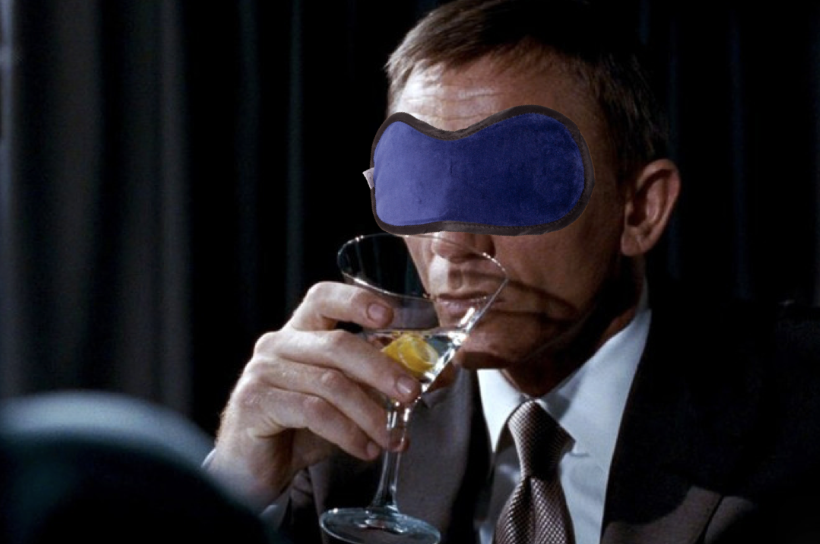

Your friend James Bond claims to know the difference between a shaken martini and a mixed one. You decided to check it out. To do this, you blindfolded Bond and let him try martinis 10 times. Let Bond guess the type of martini 6 times and miss 4. Let's test the hypothesis that Bond can tell the difference between martinis using the z-test.

*Sample:* $1, 0, 0, 1, 1, 0, 0, 1, 1, 1$

**Решение:**

$$
H_0: p \le 0.5 \\
H_1: p > 0.5
$$

$$
H_0: p = 0.5 \\ 
H_1: p > 0.5 
$$


$$
z = \frac{\hat p - 0.5}{\sqrt{\frac{0.5 (1 - 0.5)}{10}}} \sim_{n \rightarrow \infty} \mathcal{N}(0, 1)
$$

In [39]:
X = np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1])
n = len(X)
alpha = 0.05

In [40]:
p_hat = X.mean()

In [74]:
p_0 = 0.5

z_obs = (p_hat - p_0) / (p_0*(1- p_0) / 10)**0.5

z_cr = sts.norm.ppf((1 - alpha), scale = 1, loc = 0)
print(f'Z observed : {z_obs}')
print(f'Z criteria : {z_cr}')

if z_obs > z_cr:
    print('James Bond is correct or H0 is rejected')
else:    
    print('James Bond is not correct or H0 is proved')

Z observed : 0.6324555320336757
Z criteria : 1.6448536269514722
James Bond is not correct or H0 is proved


In [75]:
## Ваш код
from statsmodels.stats.proportion import proportions_ztest

z_score=proportions_ztest(sum(X), len(X), value = 0.5, alternative= 'larger')

print(z_score)


(0.6454972243679027, 0.25930250821436285)


### Problem #2: Of Mice and Men

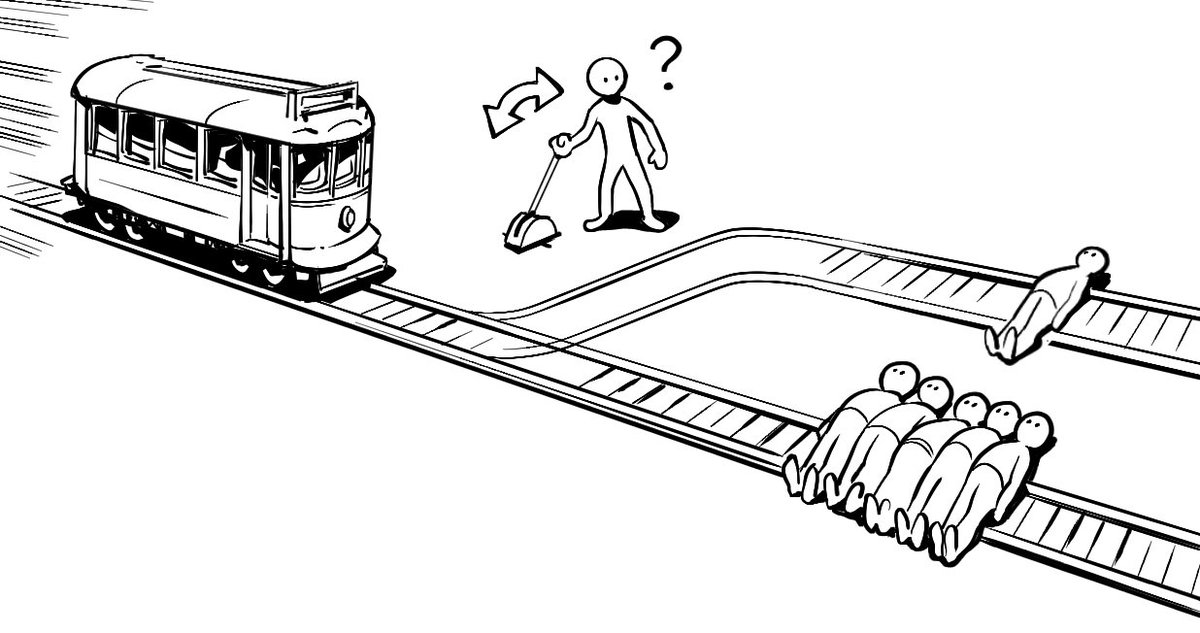

To study aspects of the moral decision-making process, psychologists have for many years used ethical dilemmas to evaluate people's actions in hypothetical situations. One of the most famous examples is [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки), in which a decision must be made about whether it is worth sacrificing one person to save five.

Belgian psychologists have brought the dilemma to life. Participants in the experiment had to choose whether to shock five mice or one mouse. The experiment proceeded as follows. The participant was seated in front of two cages, one containing five mice and the other containing one. In front of the cages was a laptop with a $20$-second timer: participants were told that after these $20$ seconds, a current would be applied to a cage containing five mice, and the mice would receive a not fatal, but very painful shock. While time is running, the participant can press a button: in this case, a current will be sent through the cage with one mouse. Live mice were used in the study.

The electric shocks were not real: immediately after the “shock,” the participants were escorted to a separate room, where they were explained that the mice were in perfect order and were not being shocked (only $12 participants guessed this in advance). $192$ people took part in solving the real trolley problem, and another $83$ solved the same problem, but hypothetical (on paper). All participants also completed online surveys, during which the scientists collected a wealth of additional information about the respondents.

The `mouse.csv` file contains information about how the experiment went. We will be interested in the columns:

* __STUDY:__ what trolley problem was solved by person $1$, if on paper, and $2$, if real
* __AGE:__ age of the respondent
* __GENDER:__ gender of the respondent
* __DECISION:__ solution to the dilemma ($1$ - press the button, $0$ - do not press)
* __RT:__ time the respondent spent clicking the button

A detailed description of the data, the data itself, and even the R code used to estimate the models can be found in [репозитории исследования.](https://osf.io/kvb99/) In the article, the authors built several logistic regressions to clean up the effect of the psychological characteristics of the respondents. We'll talk a little about these cleaning techniques later. Also, more details about the study [репозитории исследования.](https://osf.io/kvb99/)

In [56]:
import os
[file for file in os.listdir() if file.endswith('.txt')]

['data_vagon.txt']

In [57]:
df = pd.read_csv('data_vagon.txt', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION
#     (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

### Hypothesis #1: Share and button clicks

Let's try to answer the same question as the researchers. In which of two situations are respondents more likely to decide to press a button: in real life or on paper?

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(On paper and in reality they press the button equally often)} \\
&H_1: \hspace{2mm} p_1 > p_2 \hspace{2mm} \text{(On paper they press the button more often)}
\end{aligned}
$$

In [61]:
## Ваш код
mean_1 = df[df['STUDY'] ==1 ]['DECISION'].mean()
mean_2 = df[df['STUDY'] ==2 ]['DECISION'].mean()
print(mean_1)
print(mean_2)

sample_paper = df[df['STUDY'] ==1 ]['DECISION'].values
sample_real = df[df['STUDY'] ==2 ]['DECISION'].values

0.8645833333333334
0.7469879518072289


In [64]:
p_diff_sample = mean_1 -  mean_2

In [66]:
alpha = 0.05
p_diff_0 = 0

P = (sum(sample_paper) + sum(sample_real)) / (len(sample_paper) + len(sample_real))

z_sample = (p_diff_sample  - p_diff_0) / np.sqrt(P *(1 -P) * (1 / len(sample_paper) + 1 / len(sample_real) ) )

norm_gen = sts.norm(0,1)

z_criteria = norm_gen.ppf(1-alpha)

if z_sample > z_criteria:
    print('H1 is proved')
else:    
    print('H0 is proved')

H1 is proved


In [71]:
df[~df['RT'].isna()]['RT'].mean()

10.116762704819278

> __Conclusion:__ the hypothesis that the button is pressed equally often is rejected. On paper, the button is pressed more often.

### Hypothesis No. 2. Mean and bloodthirstiness

Bloodthirsty people quickly take responsibility for electrocuting the mouse. Let's assume that bloodthirsty people make a decision in less than five seconds. Is it true that people are bloodthirsty by nature?

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(People are bloodthirsty)} \\
&H_1: \hspace{2mm} \mu > 5 \hspace{2mm} \text{(People are not bloodthirsty)}
\end{aligned}
$$

In [3]:
## Ваш код